<a href="https://colab.research.google.com/github/nguyenphucloc22/test/blob/main/W8_ANN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 
from keras.models import load_model
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

<function matplotlib.pyplot.show(close=None, block=None)>

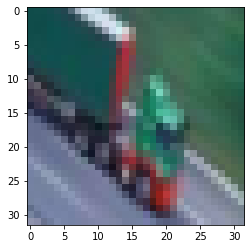

In [4]:
hinh = train_images[50]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show

In [5]:
train_images = train_images.reshape((50000,32*32*3)) 
train_images = train_images.astype('float32')/255 
test_images =  test_images.reshape((10000, 32*32*3)) 
test_images = test_images.astype('float32')/255
train_images.shape

(50000, 3072)

In [6]:
train_labels = to_categorical(train_labels, 10) 
test_labels = to_categorical(test_labels, 10)
print(train_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)


In [7]:
model = Sequential()
model.add(Dense(512,input_shape = (32*32*3,), activation='relu', name="Layer_1"))
model.add(Dense(256, activation='relu', name="Layer_2"))
model.add(Dense(128, activation='relu', name="Layer_3"))
model.add(Dense(64, activation='relu', name="Layer_4"))
model.add(Dense(10,activation='softmax', name = "Output_layer"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               1573376   
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 Layer_4 (Dense)             (None, 64)                8256      
                                                                 
 Output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 19s 45ms/step - loss: 2.0451 - accuracy: 0.2548
Epoch 2/10
391/391 [==============================] - 13s 34ms/step - loss: 1.8065 - accuracy: 0.3466
Epoch 3/10
391/391 [==============================] - 14s 36ms/step - loss: 1.7065 - accuracy: 0.3882
Epoch 4/10
391/391 [==============================] - 18s 47ms/step - loss: 1.6419 - accuracy: 0.4119
Epoch 5/10
391/391 [==============================] - 15s 37ms/step - loss: 1.5882 - accuracy: 0.4297
Epoch 6/10
391/391 [==============================] - 13s 34ms/step - loss: 1.5449 - accuracy: 0.4482
Epoch 7/10
391/391 [==============================] - 13s 34ms/step - loss: 1.5125 - accuracy: 0.4577
Epoch 8/10
391/391 [==============================] - 15s 38ms/step - loss: 1.4792 - accuracy: 0.4712
Epoch 9/10
391/391 [==============================] - 14s 36ms/step - loss: 1.4417 - accuracy: 0.4848
Epoch 10/10
391/391 [==============================] - 14s 36ms/step - loss: 1.419